In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers


# Loading the data

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()



In [3]:
input_dim = 784  # 28*28
output_dim = nb_classes = 10
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

# Planning hyperparameter tuning

With deep learning using a full ANN network there are a lot of parameters to tune, the number of layers, the number of nodes at each layer, the activation function to use at each layer, the optimizer used and the learning rate for gradient descent, the loss function used, the batch size, the number of epochs and probably more.  

My plan, which may not be optimal:
* Start by determining how many layers, keeping everything else constant
* Given the number of layers, play with an equal amount of nuerons at each layer, a increasing amount of neurons at each layer, a decreasing amount of neurons at each layer, or an increasing then decreasing amount of neurons at each layer
* Play around with the activation function at each layer.
* Play around with batch size

Again this systematic method leaves a lot of options, some which may be better, out.  The order in which I tune hyperparameters also matters.   Again better models may be left out.

# Adjusting number of hidden layers

I am going to test, 2, 3, 5 hidden layers, maybe more if it continues to improve, each with 32 nodes, using relu as an activation function and having a batch size when training of 128 with 20 epochs.

## 2 layers

In [14]:
model = Sequential()
model.add(Dense(32,input_shape=[input_dim],activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 1ms/step - loss: 1.3771 - accuracy: 0.5606
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 0.7408 - accuracy: 0.7422
Epoch 3/20
469/469 [==============================] - 0s 1ms/step - loss: 0.6231 - accuracy: 0.7841
Epoch 4/20
469/469 [==============================] - 0s 1ms/step - loss: 0.5640 - accuracy: 0.8058
Epoch 5/20
469/469 [==============================] - 0s 1ms/step - loss: 0.5294 - accuracy: 0.8171
Epoch 6/20
469/469 [==============================] - 0s 1ms/step - loss: 0.5061 - accuracy: 0.8243
Epoch 7/20
469/469 [==============================] - 0s 1ms/step - loss: 0.4895 - accuracy: 0.8290
Epoch 8/20
469/469 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.8327
Epoch 9/20
469/469 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.8372
Epoch 10/20
469/469 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.8405

<AxesSubplot:>

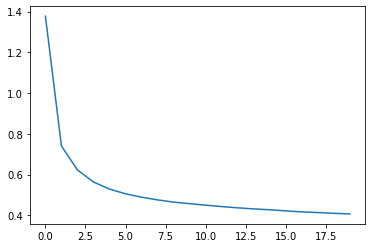

In [15]:
history1 = pd.DataFrame(history.history)
history1.loss.plot()

<AxesSubplot:>

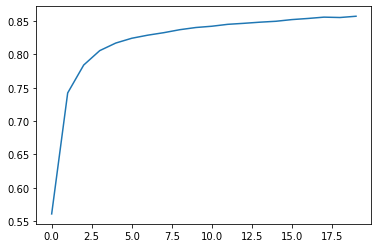

In [16]:
history1.accuracy.plot()

As you can see the loss steadily decreased and the accuracy steadily increased.  The training accuracy is 0.8574.  Looking at the test accuracy ...

In [17]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8413000106811523


There is not much difference between the train accuracy and the test accuracy, which suggests no overfitting

Testing 3 hidden layers...

In [18]:
model = Sequential()
model.add(Dense(32,input_shape=[input_dim],activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 1ms/step - loss: 1.5286 - accuracy: 0.4847
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 0.7640 - accuracy: 0.7237
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 0.6324 - accuracy: 0.7758
Epoch 4/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5766 - accuracy: 0.7984
Epoch 5/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5487 - accuracy: 0.8066
Epoch 6/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5242 - accuracy: 0.8138
Epoch 7/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5062 - accuracy: 0.8209
Epoch 8/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4931 - accuracy: 0.8248
Epoch 9/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4804 - accuracy: 0.8299
Epoch 10/20
469/469 [==============================] - 0s 1ms/step - loss: 0.4706 - accuracy: 0.8349

In [19]:
history2 = pd.DataFrame(history.history)


<AxesSubplot:>

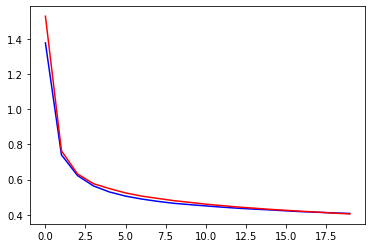

In [26]:
history1.loss.plot(color='blue')
history2.loss.plot(color='red')

<AxesSubplot:>

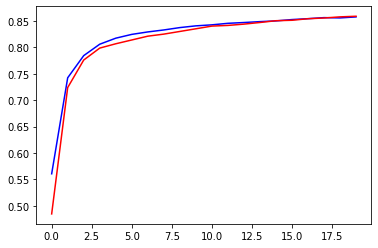

In [27]:
history1.accuracy.plot(color='blue')
history2.accuracy.plot(color='red')

In the end the loss was slightly less and the accuracy was slightly more than with 2 layers, however the decrease in loss and increase in accuracy was slower with 3 layers.  I would say stick with two layers.  

Testing 5 layers ...

In [28]:
model = Sequential()
model.add(Dense(32,input_shape=[input_dim],activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 1ms/step - loss: 1.8232 - accuracy: 0.3509
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 0.8686 - accuracy: 0.6812
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 0.7130 - accuracy: 0.7383
Epoch 4/20
469/469 [==============================] - 1s 1ms/step - loss: 0.6424 - accuracy: 0.7673
Epoch 5/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5912 - accuracy: 0.7889
Epoch 6/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5533 - accuracy: 0.8045
Epoch 7/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5277 - accuracy: 0.8138
Epoch 8/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5039 - accuracy: 0.8237
Epoch 9/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4871 - accuracy: 0.8299
Epoch 10/20
469/469 [==============================] - 1s 1ms/step - loss: 0.4746 - accuracy: 0.8324

In [29]:
history3 = pd.DataFrame(history.history)

<AxesSubplot:>

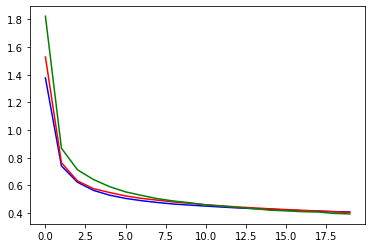

In [30]:
history1.loss.plot(color='blue')
history2.loss.plot(color='red')
history3.loss.plot(color='green')

Again the loss eventualy is lower but it is slower to reach that.  From comparing these graphs, I chose two hidden units.

## Adjusting the number of nodes

First I'm going to start with the same number of nodes at each layer, doubling each time.  16, 32, 64 ... Then when I chose the best number of  nodes, I'll play around with increasing or decreasing the number of nodes for the first layer.


In [31]:
model = Sequential()
model.add(Dense(16,input_shape=[input_dim],activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 1ms/step - loss: 1.5053 - accuracy: 0.4889
Epoch 2/20
469/469 [==============================] - 0s 1ms/step - loss: 0.7798 - accuracy: 0.7327
Epoch 3/20
469/469 [==============================] - 0s 1ms/step - loss: 0.6529 - accuracy: 0.7780
Epoch 4/20
469/469 [==============================] - 0s 857us/step - loss: 0.5902 - accuracy: 0.7996
Epoch 5/20
469/469 [==============================] - 0s 806us/step - loss: 0.5529 - accuracy: 0.8102
Epoch 6/20
469/469 [==============================] - 0s 900us/step - loss: 0.5293 - accuracy: 0.8180
Epoch 7/20
469/469 [==============================] - 0s 968us/step - loss: 0.5109 - accuracy: 0.8232
Epoch 8/20
469/469 [==============================] - 0s 880us/step - loss: 0.4972 - accuracy: 0.8277
Epoch 9/20
469/469 [==============================] - 0s 927us/step - loss: 0.4859 - accuracy: 0.8313
Epoch 10/20
469/469 [==============================] - 0s 917us/step - loss: 0.4752 - ac

In [32]:
history1 = pd.DataFrame(history.history)

<AxesSubplot:>

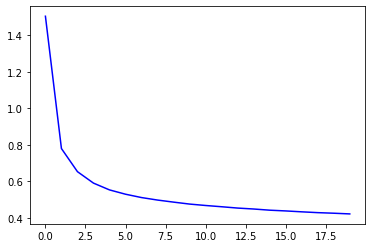

In [33]:
history1.loss.plot(color='blue')

<AxesSubplot:>

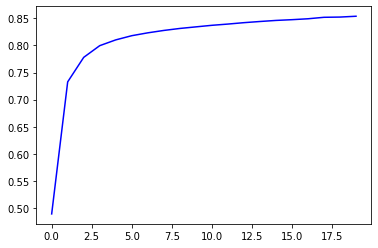

In [34]:
history1.accuracy.plot(color='blue')

Both improved steadily.  Looking at the test set accuracy.

In [35]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8402000069618225
